# IRIS ANALYSIS 

Quick notebook for well known Iris dataset analysis and classification, using tools from Scikit-learn and Pandas.

## Notebook preparation

In [5]:
%load_ext autoreload

import warnings
import sys

warnings.filterwarnings('ignore')
sys.path.append('..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Load Data 

In [10]:
df_iris = pd.read_csv('Data//Iris.csv')

## Describe Dataset

In [11]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df_iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [13]:
df_iris.groupby(by=['Species']).mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


Select all species into seperate DataFrames

In [14]:
setosa = df_iris.loc[df_iris['Species'] == 'Iris-setosa']
versicolor = df_iris.loc[df_iris['Species'] == 'Iris-versicolor']
virginica = df_iris.loc[df_iris['Species'] == 'Iris-virginica']

## Visual Analysis 

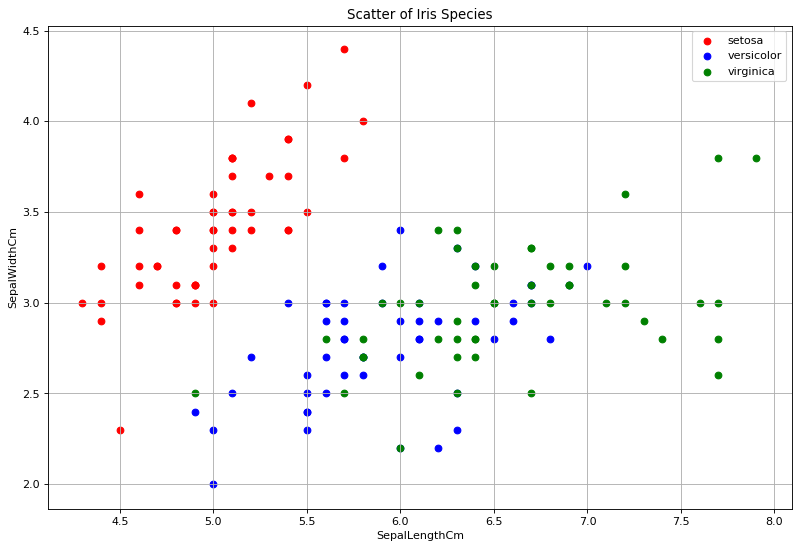

In [20]:
%matplotlib inline 

fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.scatter(np.array(setosa['SepalLengthCm']),np.array(setosa['SepalWidthCm']),c='r')
plt.scatter(np.array(versicolor['SepalLengthCm']),np.array(versicolor['SepalWidthCm']),c='b')
plt.scatter(np.array(virginica['SepalLengthCm']),np.array(virginica['SepalWidthCm']),c='g')
plt.title('Scatter of Iris Species')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend(['setosa','versicolor','virginica'])
plt.grid()

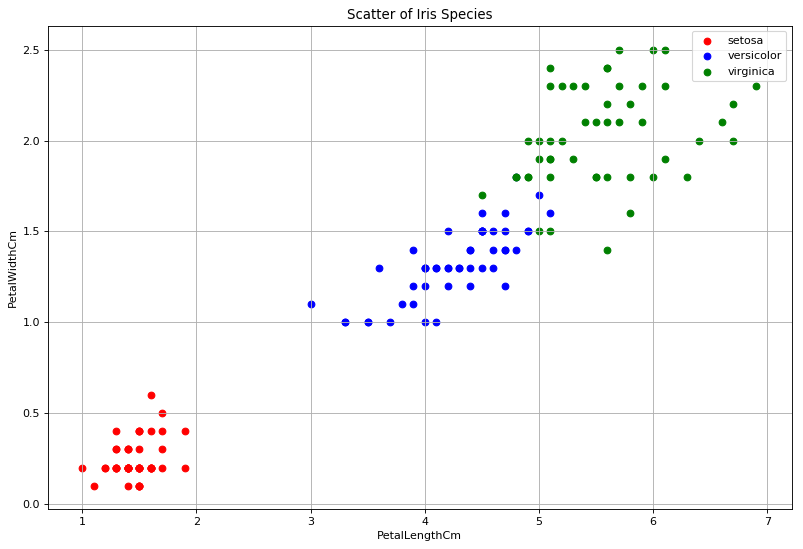

In [21]:
%matplotlib inline 

fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.scatter(np.array(setosa['PetalLengthCm']),np.array(setosa['PetalWidthCm']),c='r')
plt.scatter(np.array(versicolor['PetalLengthCm']),np.array(versicolor['PetalWidthCm']),c='b')
plt.scatter(np.array(virginica['PetalLengthCm']),np.array(virginica['PetalWidthCm']),c='g')
plt.title('Scatter of Iris Species')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend(['setosa','versicolor','virginica'])
plt.grid()

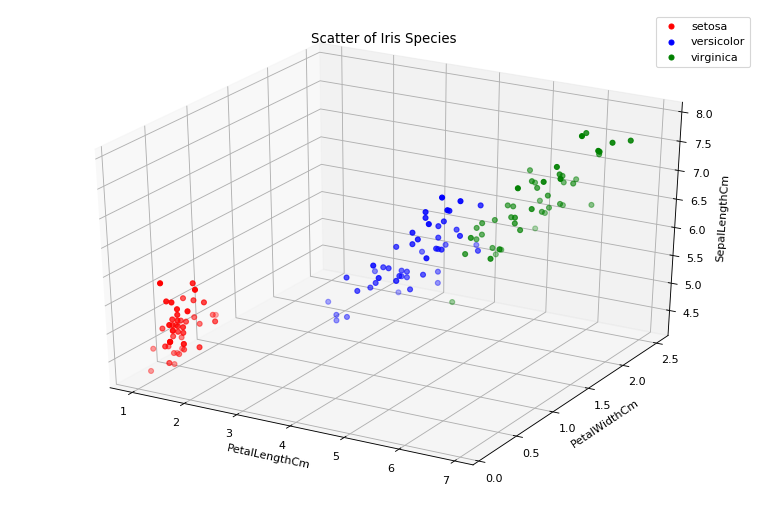

In [27]:
%matplotlib inline 

fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(np.array(setosa['PetalLengthCm']),np.array(setosa['PetalWidthCm']),np.array(setosa['SepalLengthCm']),c='r')
ax.scatter3D(np.array(versicolor['PetalLengthCm']),np.array(versicolor['PetalWidthCm']),np.array(versicolor['SepalLengthCm']),c='b')
ax.scatter3D(np.array(virginica['PetalLengthCm']),np.array(virginica['PetalWidthCm']),np.array(virginica['SepalLengthCm']),c='g')
plt.title('Scatter of Iris Species')
ax.set_xlabel('PetalLengthCm')
ax.set_ylabel('PetalWidthCm')
ax.set_zlabel('SepalLengthCm')
plt.legend(['setosa','versicolor','virginica'])
plt.grid()

## Feature preparation

In [57]:
labels = np.array(df_iris['Species'])
features = np.array(df_iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])

In [114]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.35, random_state=42)

## Model praparation

In [115]:
clf = SGDClassifier(loss='hinge', max_iter=1000, tol=None, verbose=0)

## Traning

In [116]:
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

## Testing 

In [117]:
results = clf.predict(X_test)

In [118]:
print(classification_report(y_test, results))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.89      0.94        19
Iris-versicolor       0.85      1.00      0.92        17
 Iris-virginica       1.00      0.94      0.97        17

    avg / total       0.95      0.94      0.94        53



In [119]:
cnf_matrix = confusion_matrix(y_test, results, labels=['Iris-setosa','Iris-versicolor','Iris-virginica'])

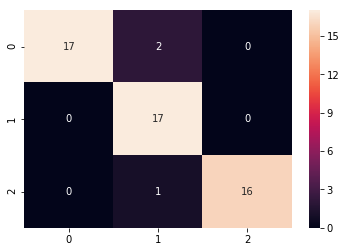

In [120]:
sns.heatmap(cnf_matrix, annot=True)